In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creating the dataframe

In [87]:
df = pd.read_csv('../ETL/Transform/diabetes_transformed.csv')
df.columns = ['id_glucose', 'register_dt', 'mood', 'anxiety_level', 'glucose', 'g_level']

In [88]:
df.sort_values(['id_glucose', 'register_dt'], inplace = True)
df.reset_index(inplace = True, drop  = True)
df.head()

,id_glucose,register_dt,mood,anxiety_level,glucose,g_level
0,0,2022-03-16 19:08:00,Sad,4,160,in range
1,1,2022-03-17 08:34:00,Normal,7,200,High
2,2,2022-03-17 17:56:00,Tired,4,125,in range
3,3,2022-03-18 17:11:00,Tired,5,89,in range
4,4,2022-03-18 20:00:00,Hungry,8,170,in range


Inspecting values to create the linear model

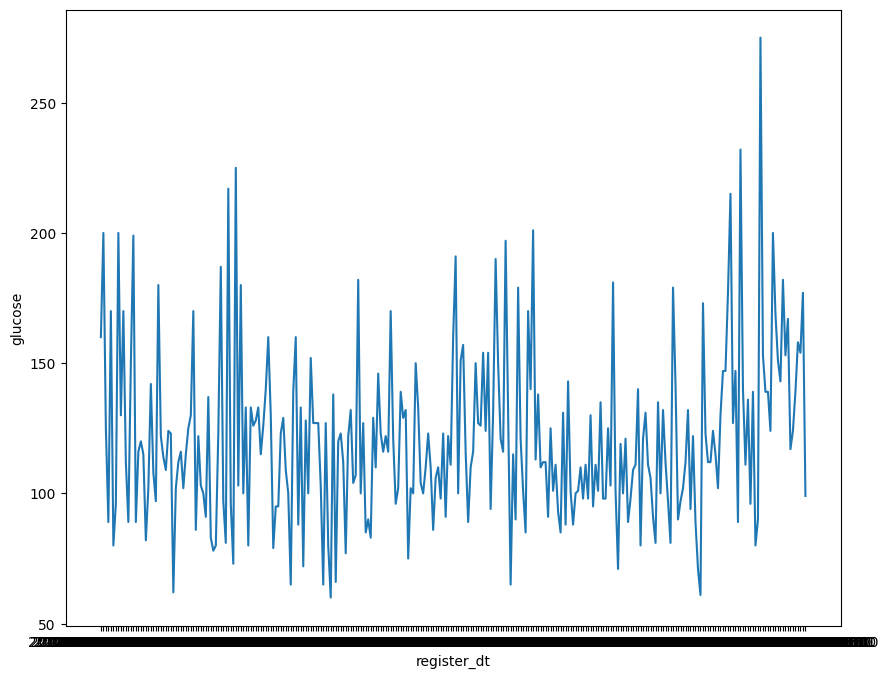

In [89]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='register_dt', y='glucose', data=df)
plt.show()

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_glucose     283 non-null    int64 
 1   register_dt    283 non-null    object
 2   mood           283 non-null    object
 3   anxiety_level  283 non-null    int64 
 4   glucose        283 non-null    int64 
 5   g_level        283 non-null    object
dtypes: int64(3), object(3)
memory usage: 13.4+ KB


Turning datetime into an ordinal variable

In [91]:
df.register_dt = pd.to_datetime(df.register_dt)

In [92]:
import datetime as dt
df['date_numeric']=df['register_dt'].map(dt.datetime.toordinal)
df.head()

,id_glucose,register_dt,mood,anxiety_level,glucose,g_level,date_numeric
0,0,2022-03-16 19:08:00,Sad,4,160,in range,738230
1,1,2022-03-17 08:34:00,Normal,7,200,High,738231
2,2,2022-03-17 17:56:00,Tired,4,125,in range,738231
3,3,2022-03-18 17:11:00,Tired,5,89,in range,738232
4,4,2022-03-18 20:00:00,Hungry,8,170,in range,738232


Setting up the variables to work

In [93]:
x = df.date_numeric
y = df.glucose

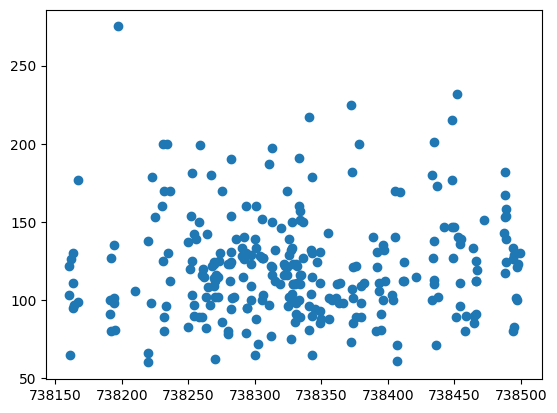

In [94]:
plt.scatter(x, y)
plt.show()

In [95]:
df[['date_numeric', 'glucose']].corr()

,date_numeric,glucose
date_numeric,1.000000,0.056643
glucose,0.056643,1.000000


Trainning the model (Linear Regresion)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [98]:
l_model = LinearRegression(fit_intercept=True)

In [99]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

In [100]:
l_model.fit(X_train, y_train)

LinearRegression()

In [101]:
l_model.coef_

array([[0.04881595]])

Calculating the model error

In [102]:
#Error valuation
from sklearn.metrics import mean_squared_error
y_train_pred = l_model.predict(X_train)
y_test_pred = l_model.predict(X_test.values.reshape(-1, 1))
print('Error train:', mean_squared_error(y_train, y_train_pred))
print('Error test:', mean_squared_error(y_test, y_test_pred))

Error train: 1062.3115360919428
Error test: 1175.7480345726194


In [103]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
print('coef: ', r2)

coef:  -0.034740000362910584


Model Viz

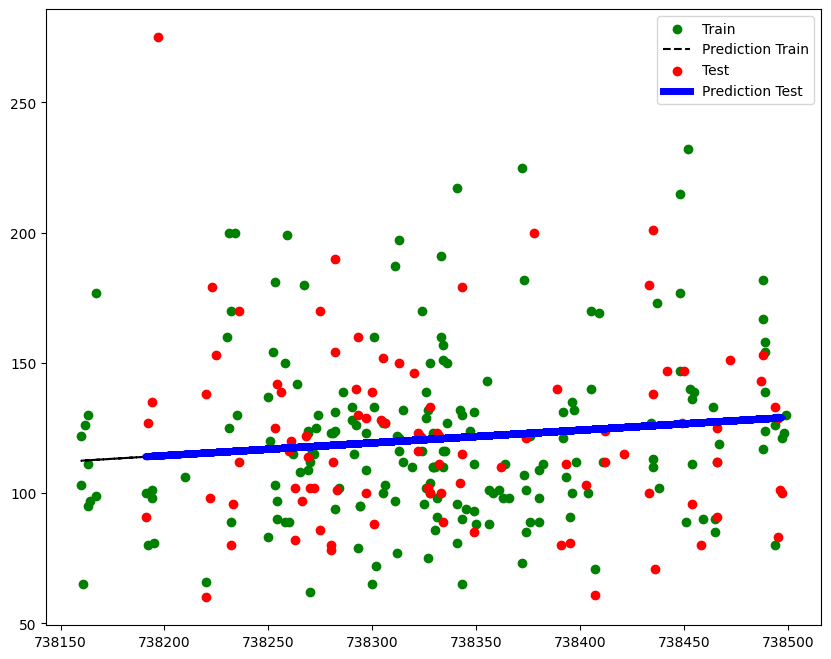

In [104]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train,  color='green', label = 'Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediction Train')

plt.scatter(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1),  color='red', label = 'Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediction Test')

plt.legend()
plt.show()

Predicting with our model

In [105]:
# Model Trial
from datetime import datetime
date_to_predict = '2023-04-01'

In [106]:
date_to_predict = datetime.strptime(date_to_predict, '%Y-%m-%d').date()
date_to_predict = date_to_predict.toordinal()

In [107]:
date_to_predict = np.array(date_to_predict)
date_to_predict = date_to_predict.reshape(-1, 1)

In [108]:
glucose_predicted = l_model.predict(date_to_predict)

In [110]:
print('The glucose predicted to 2023-04-01 is: ', int(glucose_predicted))

The glucose predicted to 2023-04-01 is:  134
